In [15]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

We define a helper function load_data_path() to load the dataset. A Folder in the dataset is labelled as OAF_Emotion/YAF_Emotion. This function will help us to add the file path along with the extracted associated emotion of that file. 

In [16]:
def load_data_path(dataset_path):
    emotions = {'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'ps':5,'sad':6}
    file_paths = []
    labels = []
    
    for root,_,files in os.walk(dataset_path):
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root,file)
                emotion = root.split('_')[-1]
                if emotion in emotions:
                    file_paths.append(file_path)
                    labels.append(emotions[emotion])
    return file_paths,labels

dataset_path  = '/Users/gaayatripradeep/Desktop/Projects/Speech Emotion Recognition/TESS'

# Load data paths and labels
file_paths, labels = load_data_path(dataset_path)

We convert the dataset into a dataframe by using the pandas DataFrame() method

In [46]:
data_df = pd.DataFrame({
    'file_path': file_paths,
    'label': labels
})

In [47]:
data_df

,file_path,label
0,/Users/gaayatripradeep/Desktop/Projects/Speech...,1
1,/Users/gaayatripradeep/Desktop/Projects/Speech...,1
2,/Users/gaayatripradeep/Desktop/Projects/Speech...,1
3,/Users/gaayatripradeep/Desktop/Projects/Speech...,1
4,/Users/gaayatripradeep/Desktop/Projects/Speech...,1
...,...,...
2795,/Users/gaayatripradeep/Desktop/Projects/Speech...,6
2796,/Users/gaayatripradeep/Desktop/Projects/Speech...,6
2797,/Users/gaayatripradeep/Desktop/Projects/Speech...,6
2798,/Users/gaayatripradeep/Desktop/Projects/Speech...,6


Visualizing the different labels in the dataset using a barplot. There are a total of 2800 files with 7 Emotions.
The emotions are :
- Angry
- Disgust
- Fear
- Happy
- Neutral
- Pleasant Surprise
- Sad



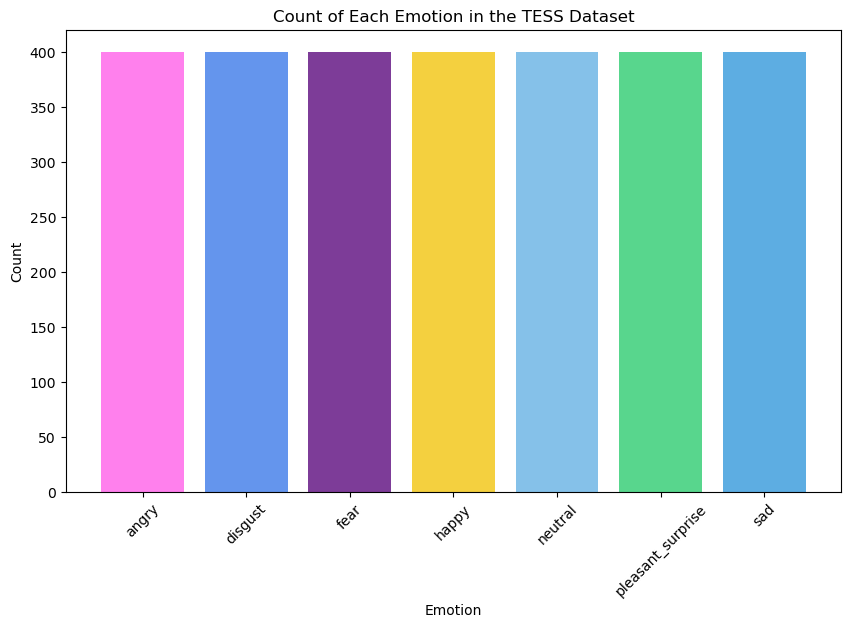

In [19]:
label_counts = data_df['label'].value_counts().sort_index()
label_names = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'pleasant_surprise', 6: 'sad'}
label_counts.index = label_counts.index.map(label_names)

# Define colors for each emotion
emotion_colors = {
    'angry': '#FF80ED',       # Pink
    'disgust': '#6495ED',     # Cornflower blue
    'fear': '#7D3C98',        # Purple
    'happy': '#F4D03F',       # Yellow
    'neutral': '#85C1E9',     # Light blue
    'pleasant_surprise': '#58D68D',  # Sea green
    'sad': '#5DADE2'          # Sky blue
}
    

plt.figure(figsize=(10, 6))
bars = plt.bar(label_counts.index, label_counts.values, color=[emotion_colors[label] for label in label_counts.index])

plt.title('Count of Each Emotion in the TESS Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [20]:
data_df.shape

(2800, 2)

## Feature Extraction

In [21]:
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    return mfccs_scaled


In [22]:
data_df['features'] = data_df['file_path'].apply(extract_features)


In [23]:
features_df = pd.DataFrame(data_df['features'].tolist())
features_df['label'] = data_df['label']

In [24]:
features_df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
0,-434.340637,61.547073,-5.816717,41.895260,-12.912008,-0.060510,-15.045928,-8.992117,-12.555532,-5.649085,...,5.249766,4.715922,2.899034,5.041161,1.725768,3.401148,2.474581,2.240072,1.373315,1
1,-388.402496,85.914452,-16.238209,19.381401,-13.622485,-6.053656,-18.407581,-6.018507,-14.872563,2.884473,...,3.281106,-0.167359,-2.203983,4.552181,1.718897,5.090023,2.597453,1.484650,3.428778,1
2,-413.214386,68.448608,1.465215,22.411884,-10.718843,-3.159255,-15.495169,-8.715068,-17.975111,0.635280,...,3.408362,-0.162028,-1.896779,3.260093,2.984894,6.697448,7.905091,6.874635,6.585638,1
3,-435.537689,54.987965,-7.957159,36.719688,-15.102768,5.779552,-17.170855,-5.765754,-10.755695,5.679981,...,4.434788,4.081763,3.692878,4.850946,1.470809,3.718441,0.821677,2.027012,-0.065100,1
4,-414.583313,85.459770,8.327278,5.927553,-8.868082,2.478487,-12.364789,-10.949555,-12.616244,3.694977,...,1.691978,1.643630,1.289320,4.418695,1.711187,3.713825,3.483528,2.428136,2.448528,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,-557.691895,76.261505,26.812920,21.027245,9.985358,14.419415,-14.963046,-6.008370,-13.508572,11.069413,...,9.778588,10.617232,7.362587,7.727941,0.763118,5.896959,8.215086,6.456235,13.564898,6
2796,-542.254028,80.854744,26.794289,22.868090,12.850275,23.111471,-0.070058,-7.567317,-11.388877,8.127281,...,11.088556,5.453731,4.719717,3.384792,-1.639035,2.709292,4.313609,6.080122,7.430555,6
2797,-510.305267,92.528488,19.663439,15.178707,9.632703,15.001949,-16.474386,-10.300098,-11.535367,6.177837,...,5.207996,-1.800246,3.025702,3.039707,7.523179,12.593367,12.249979,10.378396,10.136937,6
2798,-546.374329,101.403427,30.319857,8.416925,5.852256,15.537525,-18.954216,-9.493547,-13.774308,9.489422,...,7.481854,7.535601,8.790963,11.193414,4.744665,9.385645,11.242495,7.042445,12.690637,6


## RNN

In [25]:
from sklearn.model_selection import train_test_split

X = features_df.drop('label', axis=1)  # Features
y = features_df['label']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
X_train = np.expand_dims(X_train, axis=2)  # Add a third dimension for time steps
X_test = np.expand_dims(X_test, axis=2)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'pleasant_surprise', 'sad']

# Initialize RNN model
model = Sequential()

# Add LSTM layer
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2])))

# Optional: Add Dropout layer for regularization
model.add(Dropout(0.2))

# Add output layer
model.add(Dense(units=len(emotions), activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
print(model.summary())

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,463 (263.53 KB)

 Trainable params: 67,463 (263.53 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4686 - loss: 1.3547 - val_accuracy: 0.8518 - val_loss: 0.3927
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9087 - loss: 0.2861 - val_accuracy: 0.9357 - val_loss: 0.1955
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9430 - loss: 0.1914 - val_accuracy: 0.9375 - val_loss: 0.1693
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9398 - loss: 0.1874 - val_accuracy: 0.9482 - val_loss: 0.1600
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9516 - loss: 0.1430 - val_accuracy: 0.9411 - val_loss: 0.1507
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9671 - loss: 0.0965 - val_accuracy: 0.9393 - val_loss: 0.1809
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9722 - loss: 0.1079 - val_accuracy: 0.9643 - val_loss: 0.1133
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9775 - loss: 0.0738 - val_accuracy: 0.960

In [29]:
# Evaluate model on test data
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9766 - loss: 0.1064
Test Loss: 0.0670
Test Accuracy: 0.9821


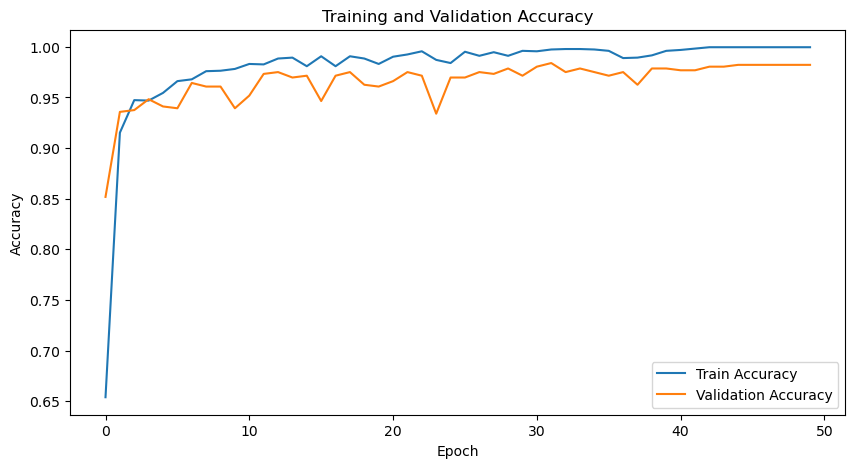

In [30]:

# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [31]:
def predict_emotion(model, file_path, emotions):
    """
    Function to predict emotion from audio file using a trained RNN model.
    
    Parameters:
    - model (tensorflow.keras.models.Sequential): Trained RNN model.
    - file_path (str): Path to audio file.
    - emotions (list): List of emotion labels.
    
    Returns:
    - str: Predicted emotion label.
    """
    # Extract features from audio file
    features = extract_features(file_path)
    
    # Reshape features for RNN input
    features = np.expand_dims(features, axis=0)  # Add batch dimension
    features = np.expand_dims(features, axis=2)  # Add time dimension
    
    # Predict emotion using the model
    predicted_probabilities = model.predict(features)
    predicted_label_index = np.argmax(predicted_probabilities)
    predicted_emotion = emotions[predicted_label_index]
    
    return predicted_emotion

In [42]:
# Define emotions list
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'pleasant_surprise', 'sad']

# Example usage: Predict emotion fr/om a test audio file
file_path = '/Users/gaayatripradeep/Downloads/ALL/JE_h11.wav'  # Replace with your actual audio file path
predicted_emotion = predict_emotion(model, file_path, emotions)

print(f"Predicted Emotion: {predicted_emotion}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Emotion: disgust


In [45]:
model.save('/Users/gaayatripradeep/Desktop/Projects/Speech Emotion Recognition/model.h5')

In [43]:
os.getcwd()

'/Users/gaayatripradeep/Desktop/Projects/Speech Emotion Recognition'